<a href="https://colab.research.google.com/github/Jdasanja/mirrored-dataset/blob/main/Project_2_Supervised_Learning_V1_7_1_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import sklearn as sk
import seaborn as sns

In [2]:
!pip install pyreadstat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 5.5 MB/s eta 0:00:00


**<h1>Step 1: Load Your Data</h1>**

In [3]:
import pandas as pd

# Load the dataset
url = 'https://github.com/Jdasanja/mirrored-dataset/blob/main/fram_heart_study.csv?raw=true'
df = pd.read_csv(url)

# Add a unique identifier column
df['patient_id'] = range(1, len(df) + 1)

# Set 'patient_id' as the index
df.set_index('patient_id', inplace=True)

print(df.head(5))

            male  age  education  currentSmoker  cigsPerDay  BPMeds  \
patient_id                                                            
1              1   39        4.0              0         0.0     0.0   
2              0   46        2.0              0         0.0     0.0   
3              1   48        1.0              1        20.0     0.0   
4              0   61        3.0              1        30.0     0.0   
5              0   46        3.0              1        23.0     0.0   

            prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP  \
patient_id                                                                   
1                         0             0         0    195.0  106.0   70.0   
2                         0             0         0    250.0  121.0   81.0   
3                         0             0         0    245.0  127.5   80.0   
4                         0             1         0    225.0  150.0   95.0   
5                         0       

**<h1>Step 2: (If not already done in Project 1) Prepare your data</h1>**

In [4]:
from sklearn.model_selection import train_test_split
# Define the features and target
# Drop the unique identifier and the target column from features
X = df.drop(columns=['TenYearCHD','age','cigsPerDay','BMI','heartRate','glucose','BPMeds', 'education', 'male','diabetes','currentSmoker','prevalentStroke','prevalentHyp'])

# Separate the target
y = df['TenYearCHD']

# Split the data with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=None)

# Now, X_train and X_test contain only relevant feature columns
# y_train and y_test contain only the target variable


In [5]:
from sklearn.model_selection import StratifiedShuffleSplit
# Stratified Shuffle Split
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(X, y):
    X_train = X.iloc[train_index]
    X_test = X.iloc[test_index]
    y_train = y.iloc[train_index]
    y_test = y.iloc[test_index]

# Verify the split
print("Shapes of the training and testing sets:")
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Shapes of the training and testing sets:
(3392, 3) (848, 3) (3392,) (848,)


In [7]:
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn.under_sampling import RandomUnderSampler
class LogTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy[self.columns] = np.log1p(X_copy[self.columns])
        return X_copy
# Define the columns to apply logarithmic transformation
log_transform_columns = ['sysBP', 'diaBP']

# Define the preprocessing pipeline
ct = ColumnTransformer(
    transformers=[
        ("log_transform", LogTransformer(log_transform_columns), log_transform_columns),
        ("scaling", StandardScaler(), ['totChol', 'sysBP', 'diaBP'])
    ],
    remainder='drop'  # drop all other columns not specified
)

# Apply the transformations
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

In [8]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(X_train)
SimpleImputer()
# apply to both the testing and training data
X_train = imp_mean.transform(X_train)
X_test = imp_mean.transform(X_test)

**<h1>Step 3: Examine your target attribute. </h1>**

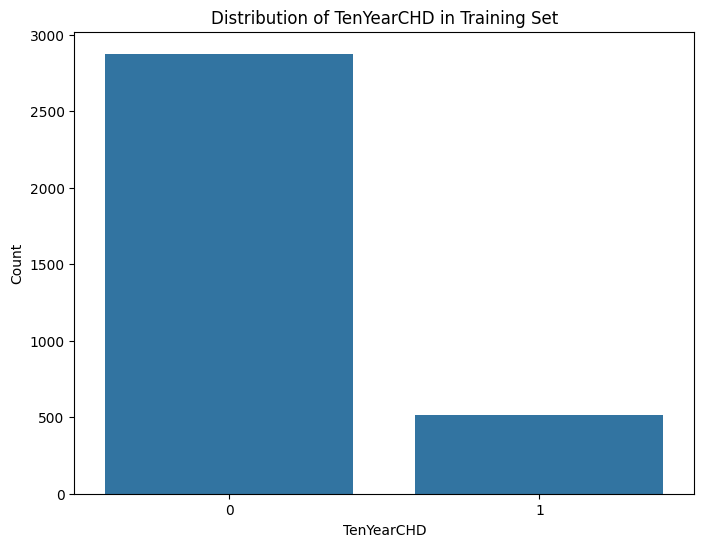

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the target attribute
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train)
plt.title('Distribution of TenYearCHD in Training Set')
plt.xlabel('TenYearCHD')
plt.ylabel('Count')
plt.show()

**<h2>Distribution analysis of target variable:</h3>**
<p> Based off the following histogram, we can assume that the distibution of the 'target' variable is considered "logarithmic distribution."
This is inferred because one class significantly dominates another. </p>

**<h1>Step 4: Selected two of the following supervised learning algorithms:Naïve Bayes & Random Forest</h1>**


**<h1>Step 4a: Naïve Bayes</h1>**

Actual Value: 0
Predicted Value: 0
Accuracy: 0.7287735849056604
F1 Score: 0.705482746583966
Precision: 0.6943491988999559
Recall: 0.7287735849056604


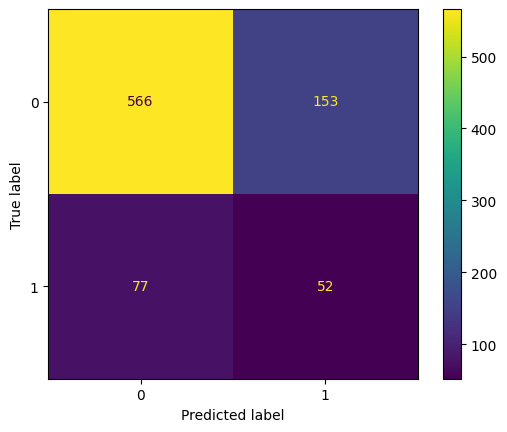

In [9]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay,precision_score, recall_score
from imblearn.under_sampling import RandomUnderSampler

# Apply RandomUnderSampler to balance the classes in the training data
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# Build a Gaussian Classifier
model = GaussianNB()

# Model training
model.fit(X_resampled, y_resampled)

# Predict Output for a single instance
predicted = model.predict([X_test[6]])

print("Actual Value:", y_test[6])
print("Predicted Value:", predicted[0])

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")
precision = precision_score(y_pred, y_test, average="weighted")
recall = recall_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

# Generate and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=model.classes_)
cmd.plot()

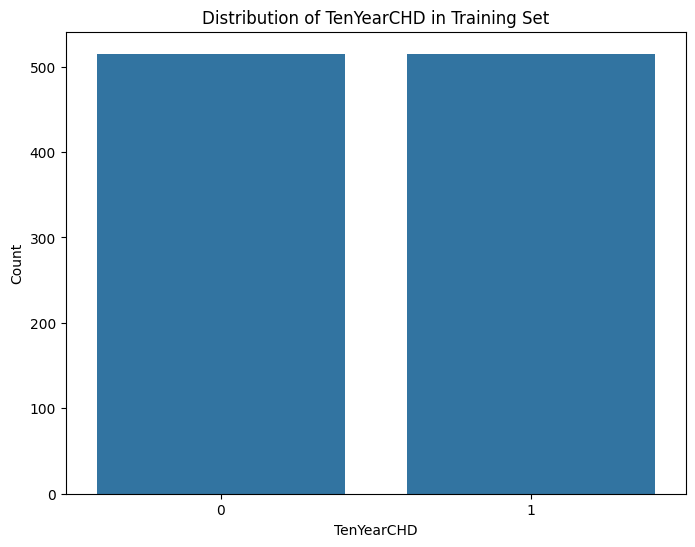

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the target attribute
plt.figure(figsize=(8, 6))
sns.countplot(x=y_resampled)
plt.title('Distribution of TenYearCHD in Training Set')
plt.xlabel('TenYearCHD')
plt.ylabel('Count')
plt.show()

**<h2>Distribution analysis of target variable:</h3>**
<p> Based off the following histogram, we can assume that the distibution of the 'target' variable is now considered "uniform distribution."
This is inferred because both classes in the training set seem more evenly distributed. </p>

**<h1>Step 5a: Naïve Bayes - Run with the default parameters using cross-validation on the whole dataset</h1>**

In [12]:
from sklearn.model_selection import cross_val_score
model = GaussianNB()

#5-fold cross validation
cv_scores_all = cross_val_score(model, X_resampled, y_resampled, cv=5)

print("cv_scores:\n{}".format(cv_scores_all))
print("cv_scores mean:\n{}".format(np.mean(cv_scores_all)))

cv_scores:
[0.60679612 0.55825243 0.60194175 0.59708738 0.61650485]
cv_scores mean:
0.596116504854369


In [13]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, f1_score

# Perform cross-validation and get predictions
y_pred = cross_val_predict(model, X_resampled, y_resampled, cv=5)

# Calculate and print metrics
precision = precision_score(y_resampled, y_pred, average='weighted')
recall = recall_score(y_resampled, y_pred, average='weighted')
f1 = f1_score(y_resampled, y_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.6078705172960964
Recall: 0.596116504854369
F1 Score: 0.5848062015503875


**<h1>Step 4b: Random Forrest</h1>**

Accuracy of the model: 0.5872641509433962
F1 Score of the model: 0.6453347144670527
Precision: 0.5777044716804152
Recall: 0.5872641509433962


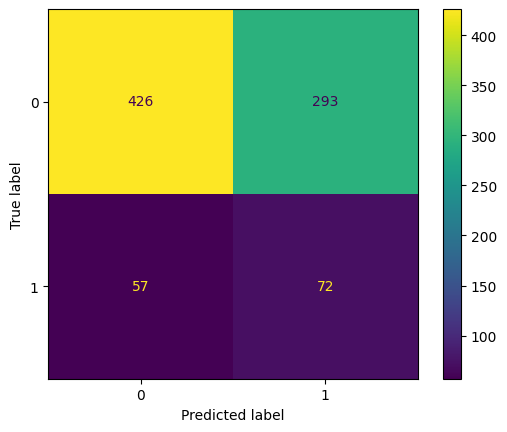

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay,precision_score, recall_score
import matplotlib.pyplot as plt

# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42,max_depth=10)

# Training the model on the training dataset
clf.fit(X_resampled, y_resampled)

# Performing predictions on the test dataset
y_pred = clf.predict(X_test)

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_pred, y_test, average="weighted")
recall = recall_score(y_pred, y_test, average="weighted")

# Print accuracy and F1 score
print(f"Accuracy of the model: {accuracy}")
print(f"F1 Score of the model: {f1}")
print("Precision:", precision)
print("Recall:", recall)


# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=clf.classes_)
cmd.plot()
plt.show()

**<h1>Step 5b: Random Forrest - Run with the default parameters using cross-validation on the whole dataset</h1>**

In [15]:
from sklearn.model_selection import cross_val_score

clf = RandomForestClassifier(n_estimators=100, random_state=42,max_depth=10)

#5-fold cross validation
cv_scores_all = cross_val_score(clf, X_resampled, y_resampled, cv=5)

print("cv_scores:\n{}".format(cv_scores_all))
print("cv_scores mean:\n{}".format(np.mean(cv_scores_all)))

cv_scores:
[0.62621359 0.57281553 0.58737864 0.54854369 0.59708738]
cv_scores mean:
0.5864077669902913


In [16]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, f1_score

# Perform cross-validation and get predictions
y_pred = cross_val_predict(clf, X_resampled, y_resampled, cv=5)

# Calculate and print metrics
precision = precision_score(y_resampled, y_pred, average='weighted')
recall = recall_score(y_resampled, y_pred, average='weighted')
f1 = f1_score(y_resampled, y_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Precision: 0.5867019767331884
Recall: 0.5864077669902913
F1 Score: 0.586056603773585


**<h1>Step 5c: Random Forrest - (Where possible) adjust 2-3 parameters for each model using grid search</h1>**

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameters to tune, based on the actual parameter result
forest_params = {
    'bootstrap': [True],
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini'],
    'max_features': ['sqrt'],
    'ccp_alpha': [0.0],
    'class_weight': [None],
    'max_leaf_nodes': [None],
    'max_samples': [None],
    'min_impurity_decrease': [0.0],
    'min_weight_fraction_leaf': [0.0],
    'n_jobs': [None],
    'oob_score': [False],
    'random_state': [None],
    'verbose': [0],
    'warm_start': [False]
}

# Initialize the RandomForestClassifier
rfc = RandomForestClassifier()

# Initialize GridSearchCV with the classifier and parameters
clf = GridSearchCV(rfc, forest_params, cv=10, scoring='precision')

# Assume X_train and y_train are already defined
# Fit the model
clf.fit(X_resampled, y_resampled)

# Get the best parameters and the best score
best_params = clf.best_params_
best_score = clf.best_score_

print("Best parameters found: ", best_params)
print("Best precision score: ", best_score)

# Retrieve and display the worst parameters and their score
results = clf.cv_results_
worst_index = results['mean_test_score'].argmin()
worst_params = results['params'][worst_index]
worst_score = results['mean_test_score'][worst_index]

print("Worst parameters found: ", worst_params)
print("Worst precision score: ", worst_score)


Best parameters found:  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 300, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Best precision score:  0.6151634288071833
Worst parameters found:  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 300, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Worst precision score:  0.5704811253817894


Accuracy of the model: 0.5872641509433962
F1 Score of the model: 0.6453347144670527
Precision: 0.5777044716804152
Recall: 0.5872641509433962


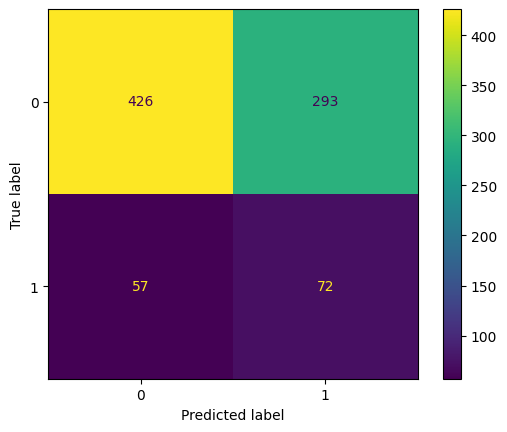

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay,precision_score, recall_score
import matplotlib.pyplot as plt

# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42,max_depth=10)

# Training the model on the training dataset
clf.fit(X_resampled, y_resampled)

# Performing predictions on the test dataset
y_pred = clf.predict(X_test)
#y_pred = cross_val_predict(clf, X_resampled, y_resampled, cv=5)
# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_pred, y_test, average="weighted")
recall = recall_score(y_pred, y_test, average="weighted")

# Print accuracy and F1 score
print(f"Accuracy of the model: {accuracy}")
print(f"F1 Score of the model: {f1}")
print("Precision:", precision)
print("Recall:", recall)


# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=clf.classes_)
cmd.plot()
plt.show()

**<h1>Step 5d: Naïve Bayes - (Where possible) adjust 2-3 parameters for each model using grid search</h1>**

In [19]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay,precision_score, recall_score
from imblearn.under_sampling import RandomUnderSampler

# Define the estimator
estimatortwo = GaussianNB()

# Get the parameters of the estimator
paramstwo = estimatortwo.get_params()

# Print the parameters
print(paramstwo)

{'priors': None, 'var_smoothing': 1e-09}


In [20]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from imblearn.under_sampling import RandomUnderSampler

# Define the parameters to tune based on the actual parameter result
nb_params = {
    'priors': [None],
    'var_smoothing': [1e-09, 1e-08, 1e-10, 1e-07]
}

# Initialize the GaussianNB classifier
estimator = GaussianNB()

# Initialize GridSearchCV with the classifier and parameters
clf = GridSearchCV(estimator, nb_params, cv=10, scoring='precision')

# Assume X_resampled and y_resampled are already defined
# Fit the model
clf.fit(X_resampled, y_resampled)

# Get the best parameters and the best score
best_params = clf.best_params_
best_score = clf.best_score_

print("Best parameters found: ", best_params)
print("Best precision score: ", best_score)

# Retrieve and display the worst parameters and their score
results = clf.cv_results_
worst_index = results['mean_test_score'].argmin()
worst_params = results['params'][worst_index]
worst_score = results['mean_test_score'][worst_index]

print("Worst parameters found: ", worst_params)
print("Worst precision score: ", worst_score)

Best parameters found:  {'priors': None, 'var_smoothing': 1e-09}
Best precision score:  0.643305721497526
Worst parameters found:  {'priors': None, 'var_smoothing': 1e-09}
Worst precision score:  0.643305721497526



**<h3>Naïve Bayes: Model Parameter Adjustment Summary:</h3>**
    <p>
        Based on the provided results, it is evident that parameter adjustment cannot be effectively performed. The grid search identified the best parameters as <code>{'priors': None, 'var_smoothing': 1e-09}</code> with a best precision score of 0.643305721497526. However, these same parameters were also identified as the worst, yielding an identical precision score of 0.643305721497526. This indicates that there is no variability in performance across different parameter settings, suggesting that either the parameter grid is too narrow, the model is insensitive to the parameter changes, or the data is not sufficiently varied to reflect differences in model performance. Therefore, further tuning or a more diverse parameter grid is necessary to explore potential improvements.
    </p>
